In [1]:
import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from risk_experiment.cogmodels.utils import rnp_get_group_parameters, rnp_get_subjectwise_parameters
from risk_experiment.cogmodels.fit_model import get_data, build_model
import os.path as op

sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
model_label = 'rnp_neural1'
session = '3t2'
bids_folder = '/data/ds-risk'
roi = 'npcr'

cm = 1/2.54  # centimeters in inches

In [3]:
df = get_data(model_label, session, bids_folder, None)
model = build_model(model_label, df, None)
idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels/ses-{session}_model-{model_label}_trace.netcdf'))

100%|██████████| 30/30 [00:01<00:00, 20.45it/s]


In [4]:
from bauer.utils.math import logistic_np

rnp = logistic_np(rnp_get_group_parameters(model, df, 'rnp', idata))

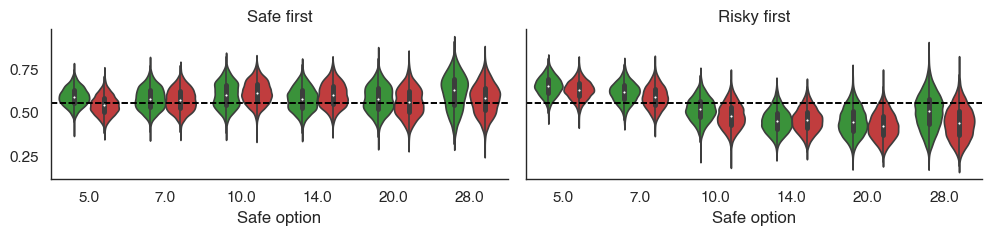

In [5]:

rnp['Order'] = rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

fac = sns.catplot(data=rnp.reset_index(), x='n_safe', y='rnp', hue='median_split_sd', col='Order', kind='violin', palette=sns.color_palette()[2:],
                  hue_order=['Low neural uncertainty', 'High neural uncertainty'],
                  col_order=['Safe first', 'Risky first'], aspect=2., height=2*3.2*cm, legend=False)

fac.set(ylabel=None, xlabel='Safe option')
fac.set_titles('{col_name}')
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-3t2_model-rnp_neural1_rnp.pdf'), bbox_inches='tight')

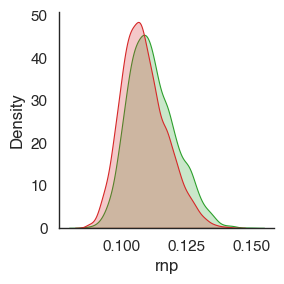

In [6]:
rnp = logistic_np(rnp_get_subjectwise_parameters(model, df, 'rnp', idata))
tmp = rnp.groupby(['subject', 'chain', 'draw', 'median_split_sd']).std().groupby(['chain', 'draw', 'median_split_sd']).mean()

fac = sns.FacetGrid(tmp.reset_index(), hue='median_split_sd',  palette=sns.color_palette()[2:], hue_order=['Low neural uncertainty', 'High neural uncertainty'])
fac.map(sns.kdeplot, 'rnp', fill=True)

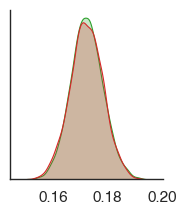

In [7]:
rnp['distance_to_risk_neutral'] = (rnp['rnp'] - .55).abs()

tmp = rnp.groupby(['chain', 'draw', 'median_split_sd']).mean()

fac = sns.FacetGrid(tmp.reset_index(), hue='median_split_sd', palette=sns.color_palette()[2:], hue_order=['Low neural uncertainty', 'High neural uncertainty'],
                    height=6.4*cm)
fac.map(sns.kdeplot, 'distance_to_risk_neutral', fill=True)

fac.set(xlabel=None, ylabel=None, yticks=[])


# 7T full model

In [8]:
session = '7t2'

100%|██████████| 30/30 [00:01<00:00, 19.14it/s]


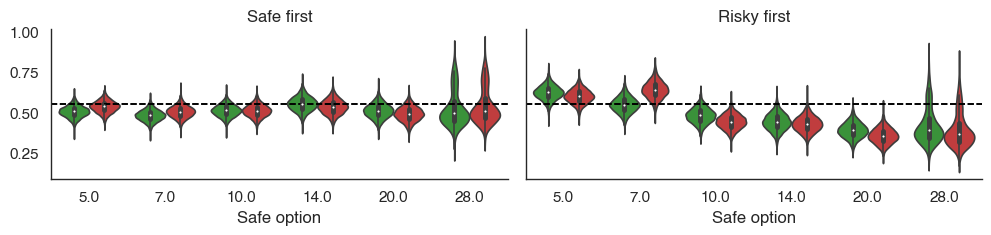

In [9]:
df = get_data(model_label, session, bids_folder, None)
model = build_model(model_label, df, None)
idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels/ses-{session}_model-{model_label}_trace.netcdf'))

from bauer.utils.math import logistic_np

rnp = logistic_np(rnp_get_group_parameters(model, df, 'rnp', idata))


rnp['Order'] = rnp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

fac = sns.catplot(data=rnp.reset_index(), x='n_safe', y='rnp', hue='median_split_sd', col='Order', kind='violin', palette=sns.color_palette()[2:],
                  hue_order=['Low neural uncertainty', 'High neural uncertainty'],
                  col_order=['Safe first', 'Risky first'], aspect=2., height=2*3.2*cm, legend=False)

fac.set(ylabel=None, xlabel='Safe option')
fac.set_titles('{col_name}')
fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))

fac.map(lambda *args, **kwargs: plt.axhline(0.55, c='k', ls='--'))
plt.savefig(op.join(bids_folder, 'derivatives', 'figures', 'ses-7t2_model-rnp_neural1_rnp.pdf'), bbox_inches='tight')

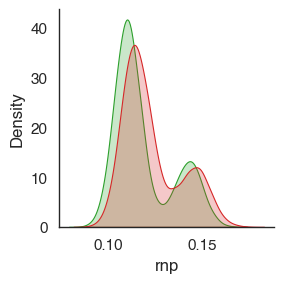

In [10]:
rnp = logistic_np(rnp_get_subjectwise_parameters(model, df, 'rnp', idata))
tmp = rnp.groupby(['subject', 'chain', 'draw', 'median_split_sd']).std().groupby(['chain', 'draw', 'median_split_sd']).mean()

fac = sns.FacetGrid(tmp.reset_index(), hue='median_split_sd',  palette=sns.color_palette()[2:], hue_order=['Low neural uncertainty', 'High neural uncertainty'])
fac.map(sns.kdeplot, 'rnp', fill=True)

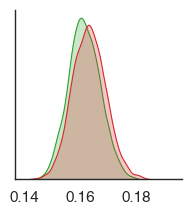

In [11]:
rnp['distance_to_risk_neutral'] = (rnp['rnp'] - .55).abs()

tmp = rnp.groupby(['chain', 'draw', 'median_split_sd']).mean()

fac = sns.FacetGrid(tmp.reset_index(), hue='median_split_sd', palette=sns.color_palette()[2:], hue_order=['Low neural uncertainty', 'High neural uncertainty'],
                    height=6.4*cm)
fac.map(sns.kdeplot, 'distance_to_risk_neutral', fill=True)

fac.set(xlabel=None, ylabel=None, yticks=[])


# 3T simplest model

In [12]:
model_label = 'rnp_neural2'
session = '3t2'

In [13]:
df = get_data(model_label, session, bids_folder, None)
model = build_model(model_label, df, None)
idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels/ses-{session}_model-{model_label}_trace.netcdf'))

100%|██████████| 30/30 [00:01<00:00, 15.86it/s]


In [14]:
from bauer.utils.math import logistic_np

rnp = logistic_np(rnp_get_group_parameters(model, df, 'rnp', idata))
gamma = rnp_get_group_parameters(model, df, 'gamma', idata)

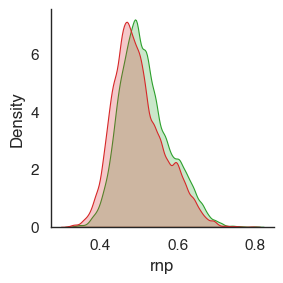

In [15]:
fac = sns.FacetGrid(rnp.reset_index(), hue='median_split_sd', palette=sns.color_palette()[2:], hue_order=['Low neural uncertainty', 'High neural uncertainty'])

fac.map(sns.kdeplot, 'rnp', fill=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_20347/3941675439.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tmp.iloc[:, 0] - tmp.iloc[:, 1])


<Axes: ylabel='Density'>

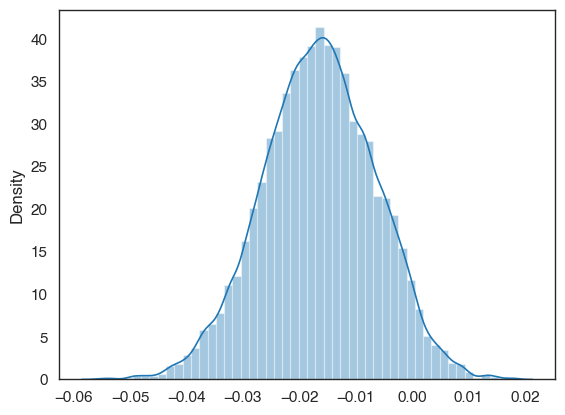

In [21]:
tmp = rnp.droplevel('permutation', 0).unstack('median_split_sd')['rnp']

sns.distplot(tmp.iloc[:, 0] - tmp.iloc[:, 1])

In [ ]:
# 7T simplest model